# **Анализ оттока клиентов банка**

# Введение

**Цель:** Выявить ключевые сегменты клиентов с максимальным риском оттока, определить причины их ухода, разработать перечень рекомендаций для службы маркетинга и продукта, направленных на снижение оттока.

**Задачи:**
1) Загрузка датасета и импорт библиотек,
2) Разведочный анализ данных (EDA),
3) Исследовательский анализ данных,
4) Создание сводной таблицы с ключевыми инсайтами,
5) Подготовка способов проверки ключевых гипотез для отвественных подразделений,
6) Составление портретов клиентов,
7) Составление сегментов киентов в соответствии с их подверженности уходу из банка,
8) Подготовка рекомендаций для бизнеса.
  

# 1. Загрузка датасета и импорт библиотек

Для данного исследования использовался датасет с Kaggle: [Bank Customer Churn Prediction dataset](http://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction).

Датасет представляет собой набор данных о пользователях банка США.

* **Customer ID**: ID для каждого клиента
* **Surname**: фамилия клиента
* **Credit Score**: кредитный рейтинг 
* **Geography**: страна проживания 
* **Gender**: пол 
* **Age**: возраст
* **Tenure**: количество лет, в течение которых пользователь является клиентом банка
* **Balance**: баланс счета
* **NumOfProducts**: количество банковских продуктов, которыми пользуется клиент (сберегательный счет, кредитная карта и др.)
* **HasCrCard**: имеет ли клиент кредитную карту
* **IsActiveMember**: активный ли клиент
* **EstimatedSalary**: предполагаемая зарплата клиента 
* **Exited**: ушел ли клиент (целевая переменная)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind

In [2]:
# сохраним файл с данными в переменную df
df = pd.read_csv('/kaggle/input/bank-customer-churn-prediction/Churn_Modelling.csv')

In [3]:
# выведем на экран первые 5 строк датасета 
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


* Статистические характеристики каждого столбца датасета соответствуют целям анализа - некорректных значений нет.

# 2. Разведочный анализ данных (EDA)

In [7]:
# работа с пропусками
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* Как видим, в датасете нет пропусков

In [8]:
# проверим датасет на наличие дубликатов
print(df.duplicated().sum())
print(df['CustomerId'].duplicated().sum())

0
0


In [9]:
# проверим на корректность содержимое столбцов с категориальными переменными
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['HasCrCard'].unique())
print(df['IsActiveMember'].unique())
print(df['Exited'].unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[1 0]
[1 0]
[1 0]


* В датасете нет дубликатов, значения категориальных переменных корректны.
  

# *2.1 Распределение целевой переменной*

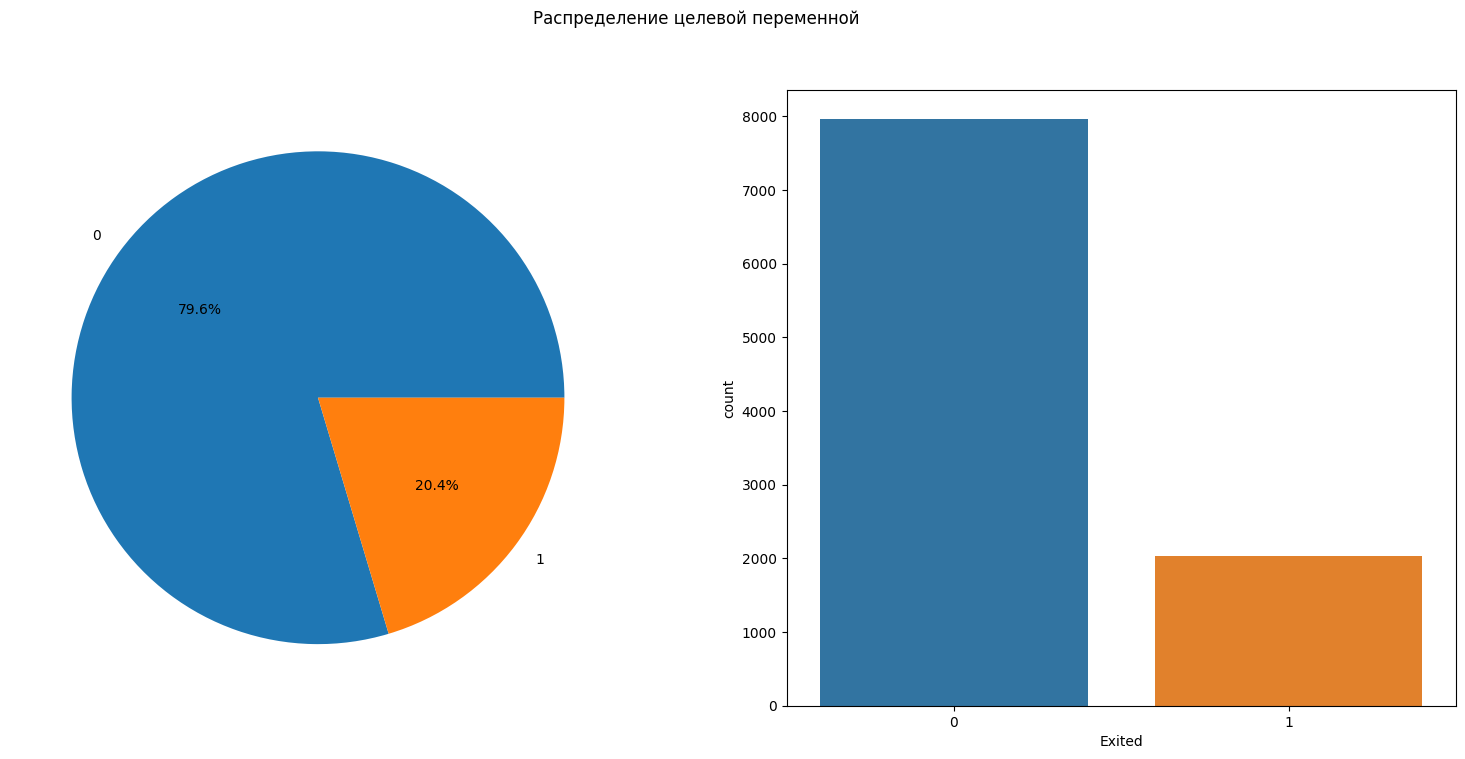

In [10]:
f,ax=plt.subplots(1,2,figsize=(19,8))
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
ax[0].set_ylabel('')
sns.countplot(x='Exited',data=df,ax=ax[1])
plt.suptitle('Распределение целевой переменной')
plt.show()

* Видим, что классы несбалансированны: 80% клиентов осталось , 20% ушло. 

# *2.2 Анализ категориальных переменных* 

Сначала определим столбцы с категориальными и вещественными переменными.

In [11]:
unique_counts = df.nunique()

threshold = 12

continuous_vars = unique_counts[unique_counts > threshold].index.tolist()
categorical_vars = unique_counts[unique_counts <= threshold].index.tolist()

print(f"Категориальные переменные: {categorical_vars}")
print(f"Вещественные переменные: {continuous_vars}")

Категориальные переменные: ['Geography', 'Gender', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'Exited']
Вещественные переменные: ['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Age', 'Balance', 'EstimatedSalary']


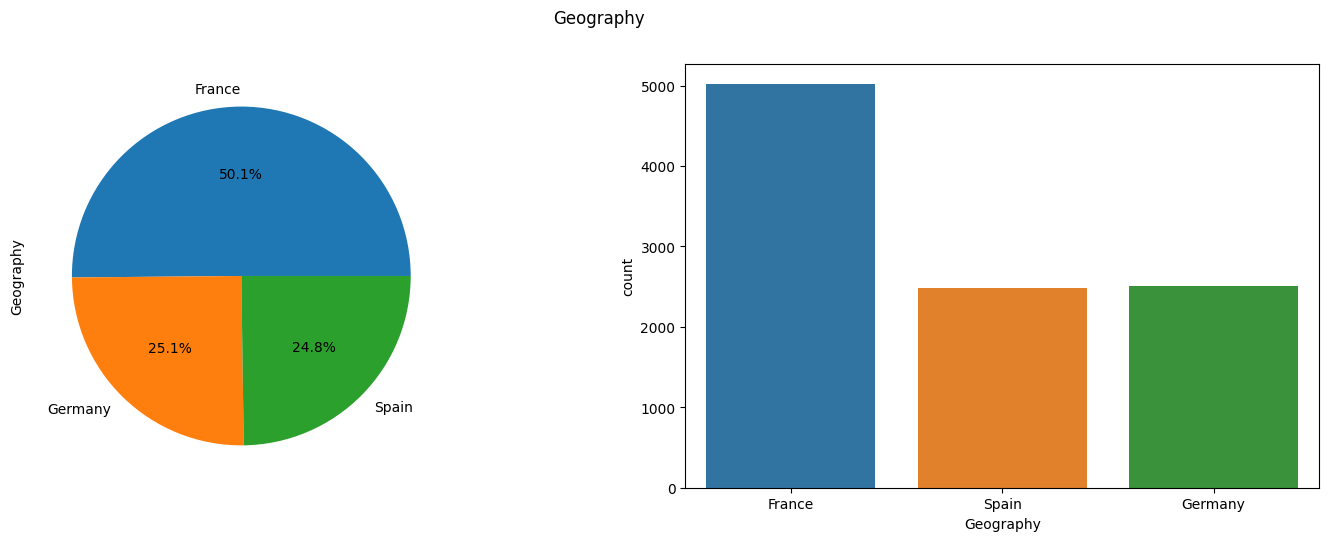

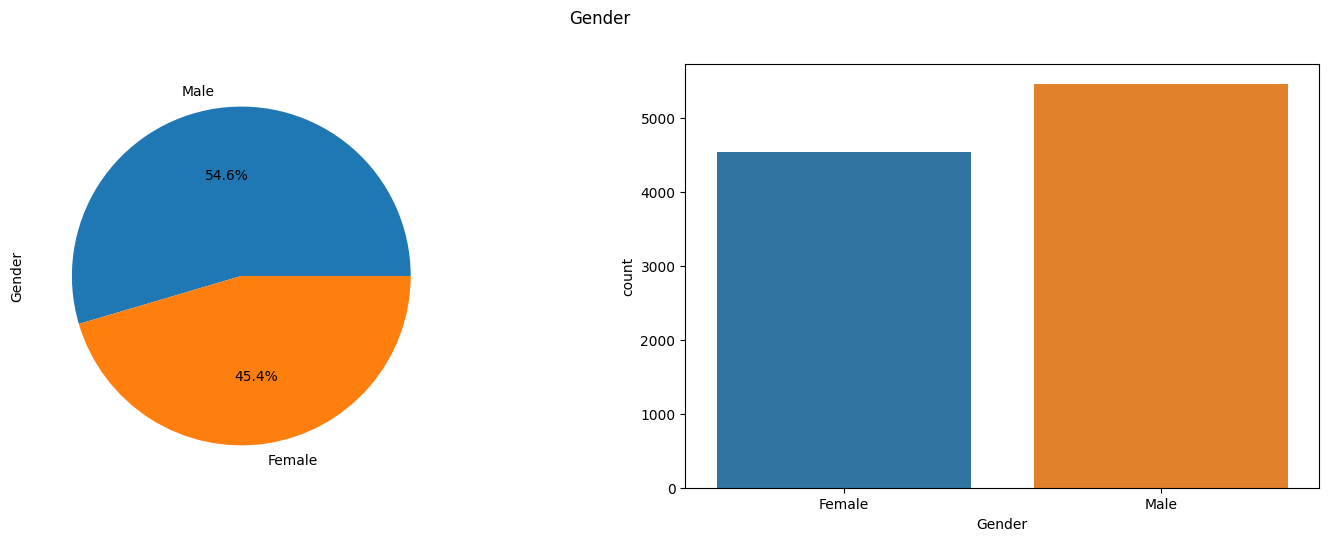

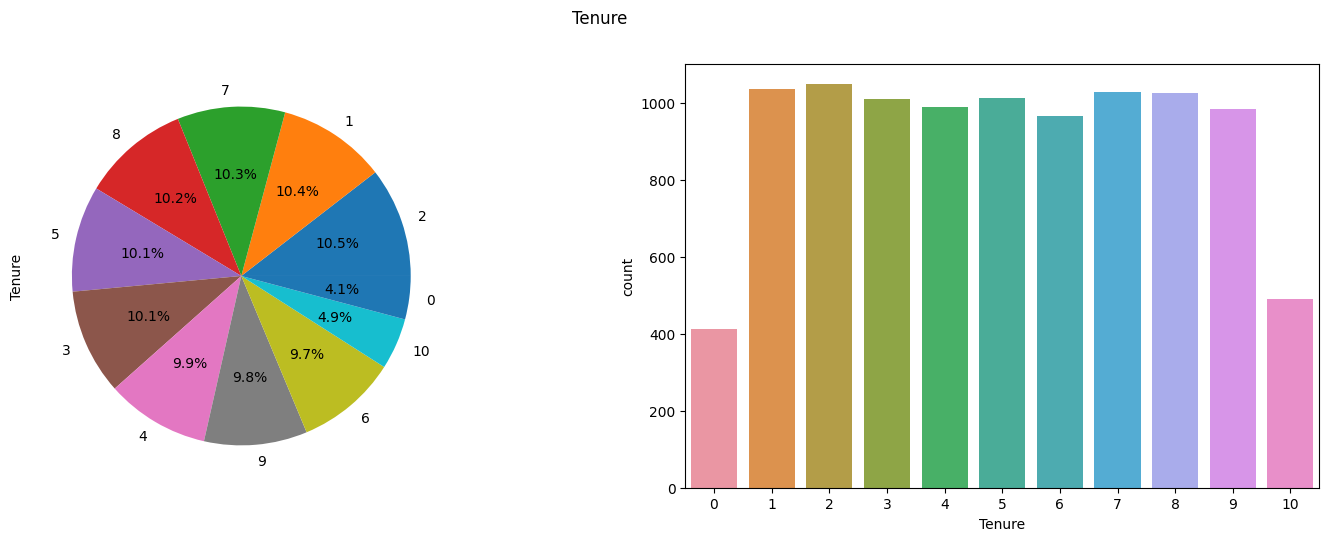

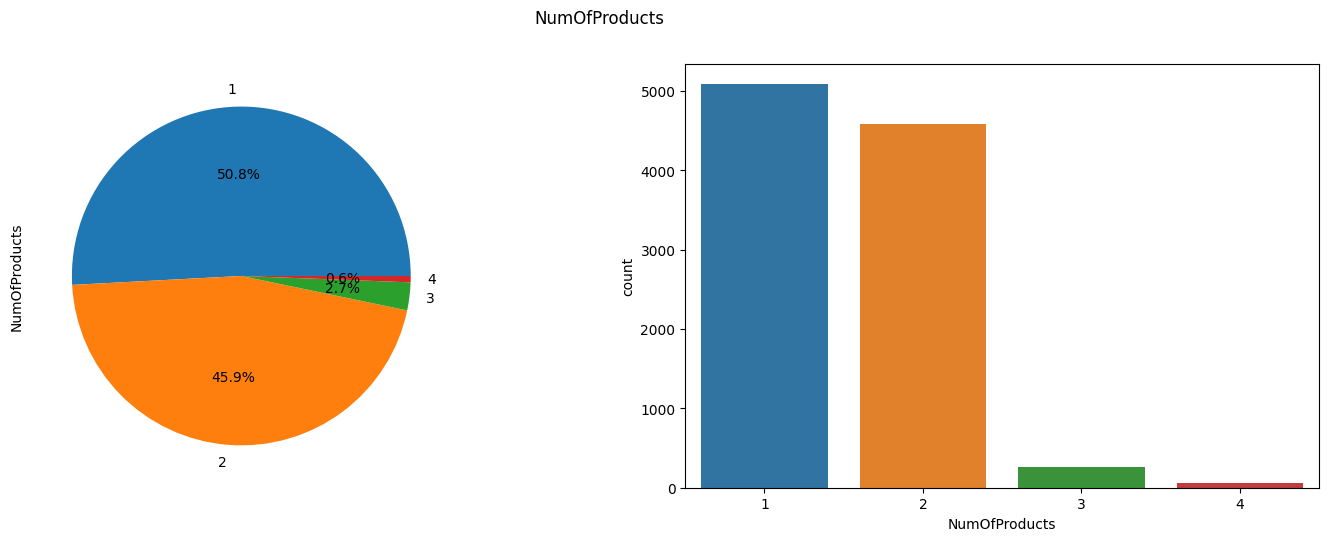

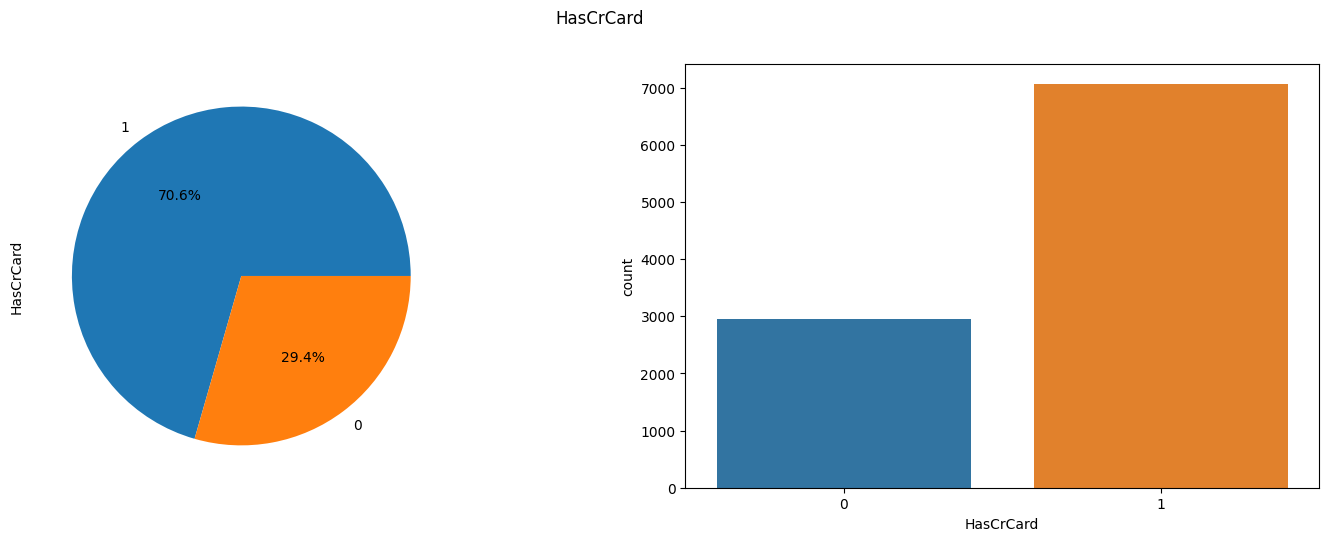

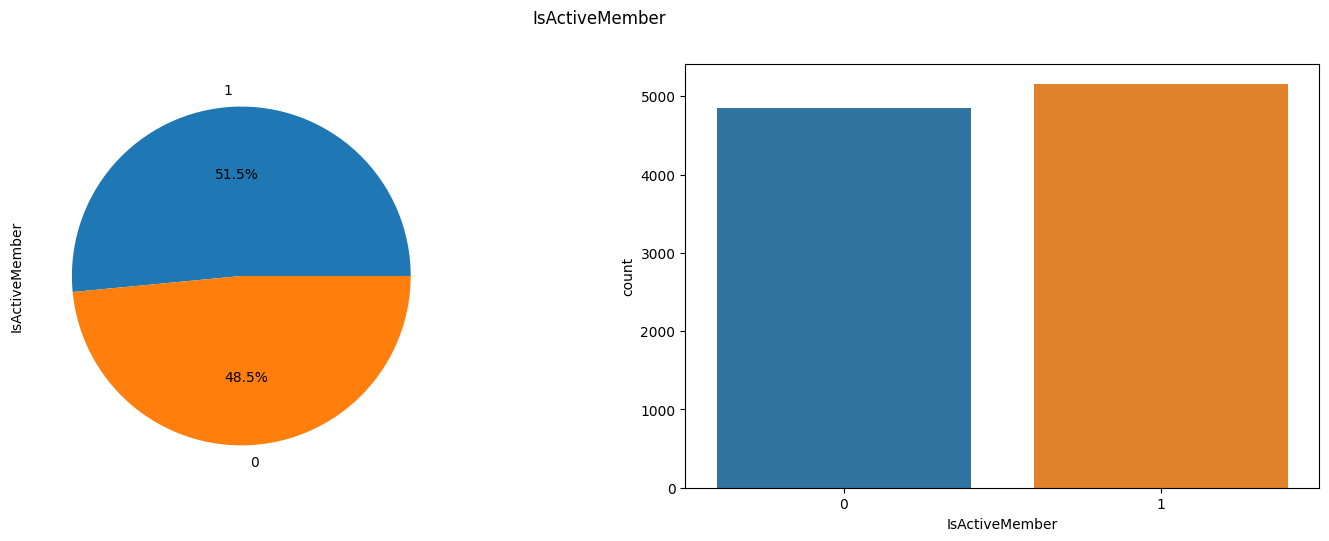

In [12]:
categorical_vars.remove('Exited')

for column in categorical_vars:
    f,ax=plt.subplots(1,2,figsize=(18,5.5))
    df[column].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0])
    ax[0].set_ylabel(f'{column}')
    sns.countplot(x=column,data=df,ax=ax[1])
    plt.suptitle(f'{column}')
    plt.show()

* Заметим, что такие категориальные пременные, как Gender, Tenure и IsActiveMember в датасете распределены почти равномерно.

# *2.3 Анализ вещественных переменных* 

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

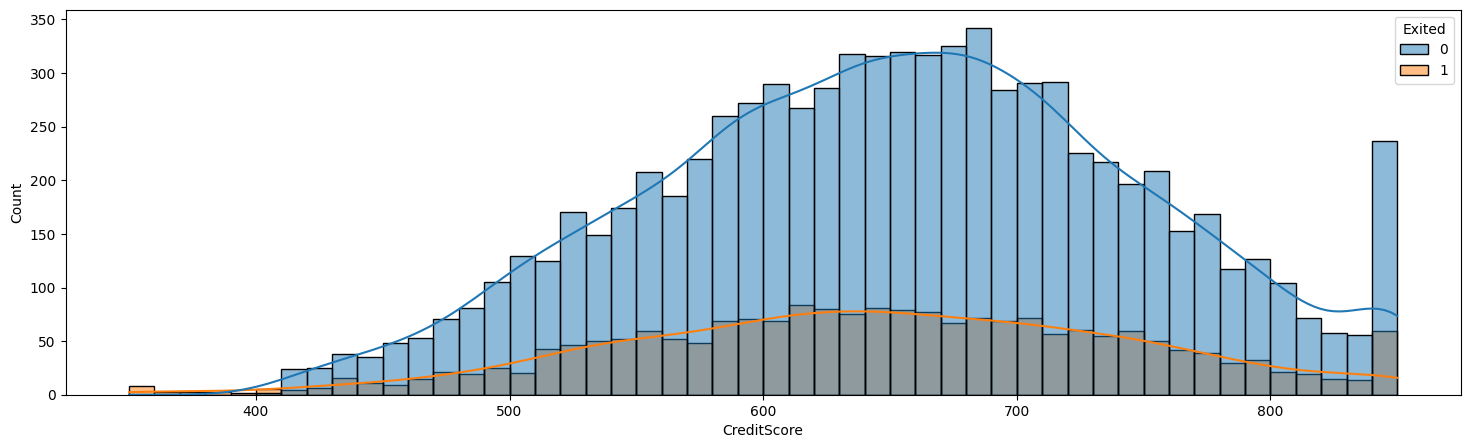

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

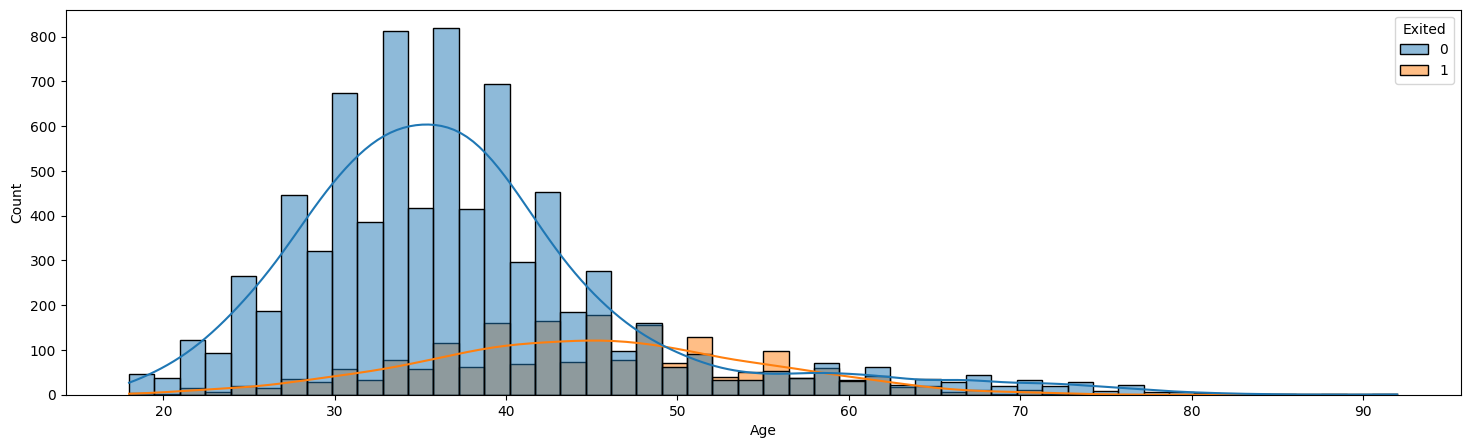

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


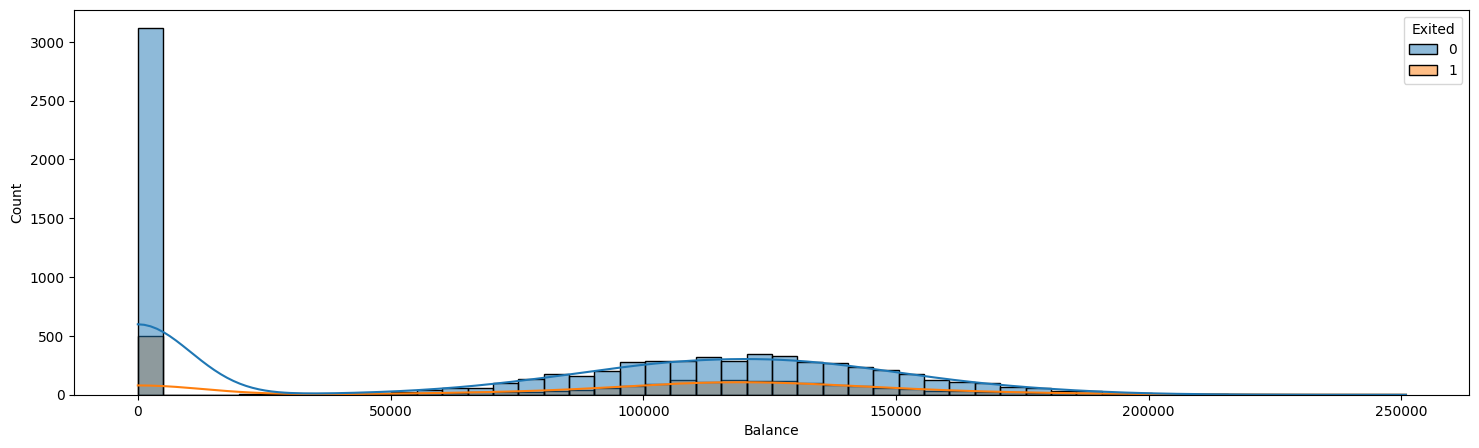

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


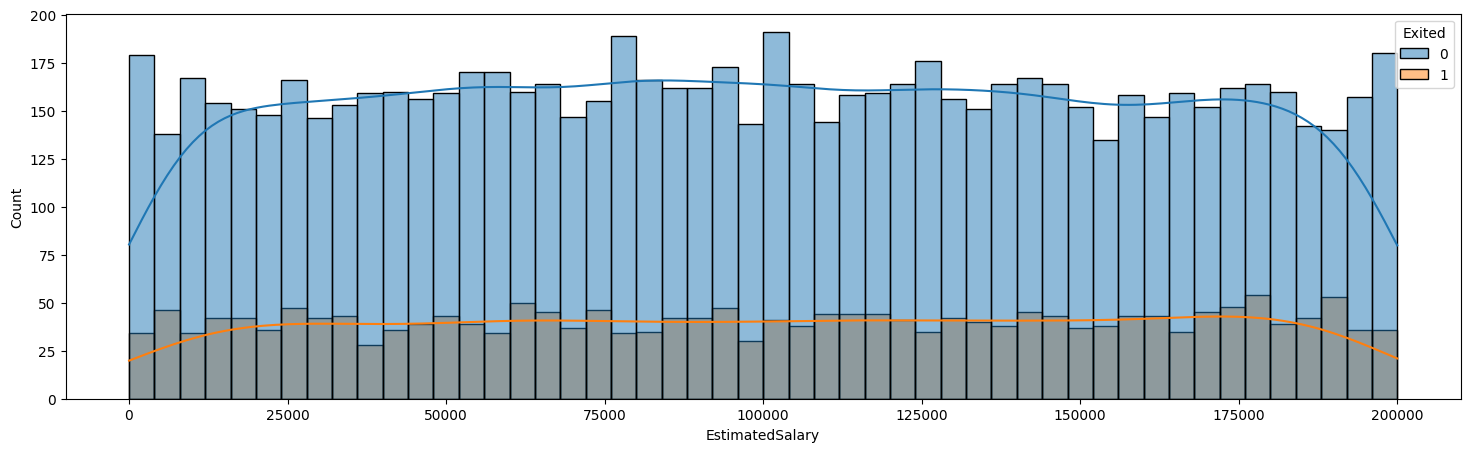

In [13]:
# удалим столбцы с id, фамилией и номером строки
continuous_vars.remove('CustomerId')
continuous_vars.remove('Surname')
continuous_vars.remove('RowNumber')

for column in continuous_vars:
    fig, ax = plt.subplots(figsize=(18, 5))
    fig = sns.histplot(data=df, x=column, hue="Exited", bins=50, kde=True)
    plt.show()

* Большинство значений переменной Balance равно 0, что смещает распределение в сторону 0.
* Распределения переменных Age и CreditScore также ассиметричны.
* Для обоих классов целевой переименной распределения одинаковы для всех вещественных переменных, за исключением Age - тут распределение 1 класса смещено вправо относительно 0 класса. Заметим, что после 50-ти лет количество ушедших и оставшихся пользователей примерно одинаково, когда для возраста меньше 50-ти количество ушедших клиентов заметно меньше.

# *2.4 Кодирование категориальных переменных*

In [14]:
# преобразуем категориальные переменные с помощью OneHotEncoding для дальнейшего анализа
df['Geography_2']=df['Geography']
df['Gender_2']=df['Gender']
df = pd.get_dummies(df, columns = ['Geography_2', 'Gender_2'])

In [15]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_2_France,Geography_2_Germany,Geography_2_Spain,Gender_2_Female,Gender_2_Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


In [16]:
df = df.rename (
    columns = ({
        'Geography_2_France':'France', 'Geography_2_Germany':'Germany','Geography_2_Spain':'Spain', 
        'Gender_2_Female':'Female', 'Gender_2_Male':'Male'
    }))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False


# *2.5 Категоризация клиентов по возрасту*

Мы хотим найти сегменты клиентов, склонных к оттоку. Посмотрим на распределение возрастов ушедших клиентов
и разделим клиентов на возрастные группы для дальнейшего анализа.

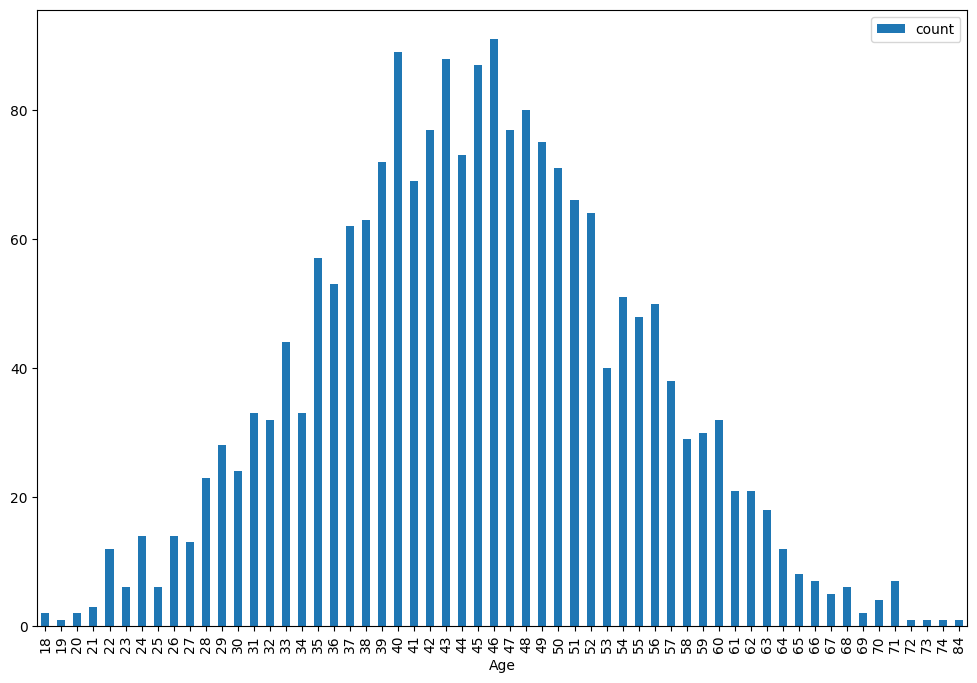

In [17]:
df[df['Exited']==1]['Age'].value_counts().reset_index().rename(columns={'index':'age', 'age':'count'}).\
sort_values(by='Age').plot(kind='bar', figsize = (12,8), x = 'Age', y = 'count');

Разделим клиентов на следующие группы:
* от 18 до 25 лет (студенты, начало карьеры)
* от 26 до 34 лет (молодые профессионалы, создание семьи)
* от 35 до 52 лет (семейные, ипотека, накопления)
* от 53 до 60 лет (опытные, пик доходов)
* 61+ лет (предпенсионный и пенсионный возраст)
  
Данное разбиение хорошо отражает жизненные этапы пользователя и легко интерпретируется. Также выделенные группы, исходя из графика, имеют схожие паттерны оттока.

In [18]:
def age_group(age):
    if 26 > age >= 18:
        return '18-25'
    if 34 >= age >= 26:
        return '26-34'
    if 52 >= age >= 35:
        return '35-52'
    if 60 >= age >= 53:
        return '53-60'
    if 61 <= age:
        return '61+'
        
# создадим новый столбец в датарейме для отнесения клиента к возрастной группе
df['age_group'] = df['Age'].apply (age_group)
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain,Female,Male,age_group
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False,True,False,35-52
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True,True,False,35-52
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False,True,False,35-52
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False,True,False,35-52
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True,True,False,35-52


In [19]:
# OneHotEncoding для последующего рассчета корреляции
df['age_group_2']=df['age_group']
df = pd.get_dummies(df, columns = ['age_group_2'])
df = df.rename (columns = ({
    'age_group_2_18-25':'18-25', 'age_group_2_26-34':'26-34','age_group_2_35-52':'35-52','age_group_2_53-60':'53-60','age_group_2_61+':'61+'}))
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Germany,Spain,Female,Male,age_group,18-25,26-34,35-52,53-60,61+
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,False,False,True,False,35-52,False,False,True,False,False
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,False,True,True,False,35-52,False,False,True,False,False
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,False,False,True,False,35-52,False,False,True,False,False
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,False,False,True,False,35-52,False,False,True,False,False
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,False,True,True,False,35-52,False,False,True,False,False


In [20]:
# удалим столбцы, в которых остались категориальные переменные, а также RowNumber
df_corr = df.drop(['RowNumber', 'Surname', 'Geography', 'Gender', 'age_group'], axis=1)

# 3. Исследовательский анализ данных

Построим тепловую карту с коэффициентами корреляции и выявим, насколько целевая переменная коррелирует с другими переменными.

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


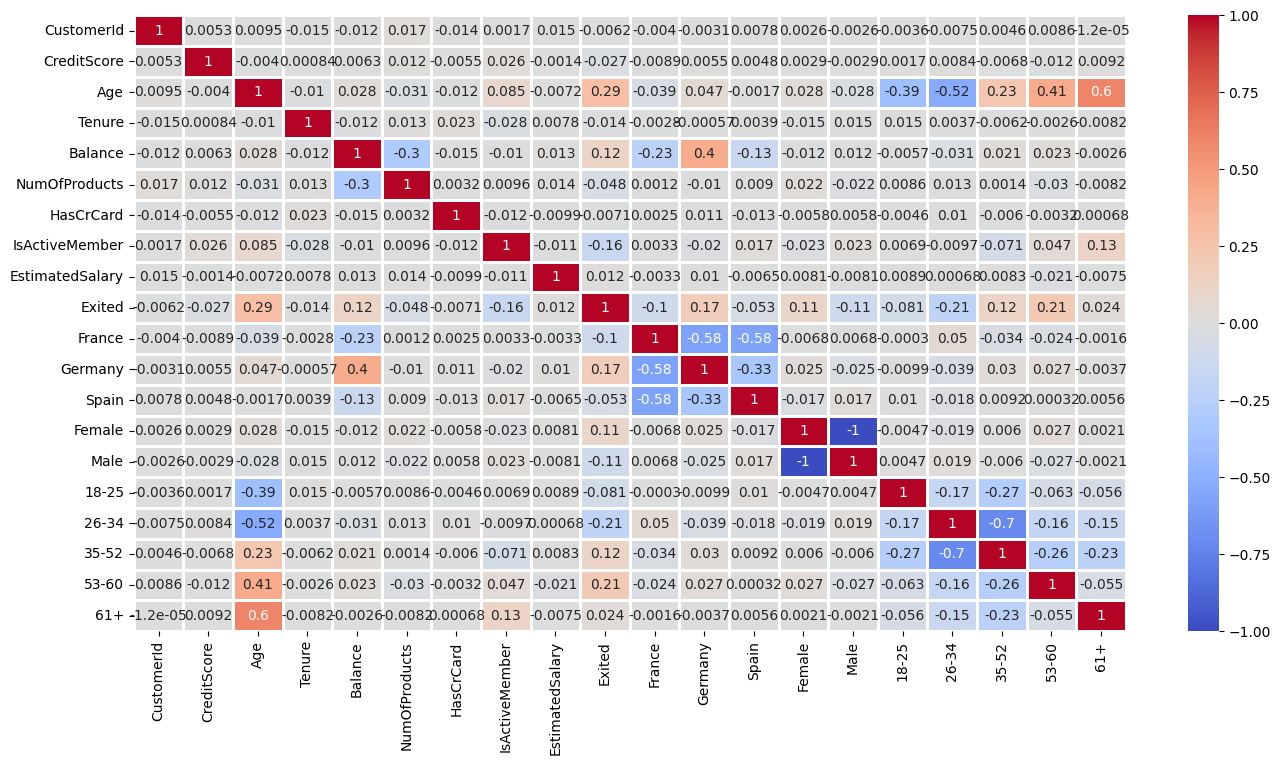

In [21]:
plt.figure(figsize=(16,8))
sns.heatmap (df_corr.corr(), annot=True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1);

Наибольшая корреляция с целевой переменной Exited наблюдается у следующих переменых:
1. Возраст клиента (Age),
2. Страна клиента (Germany, France, Spain),
3. Пользовательская активность (IsActiveMember),
4. Баланс на счету (Balance),
5. Пол (Male/Female),
6. Количество используемых продуктов (NumOfProducts),
7. Кредитный рейтинг (CreditScore).

Каждую из этих переменных рассмотрим в отдельности.

# *3.1 Возраст клиента* 

,sum,count,perc
age_group,,,
18-25,46,611,7.528642
26-34,244,3068,7.953064
35-52,1314,5281,24.881651
53-60,318,576,55.208333
61+,115,464,24.784483


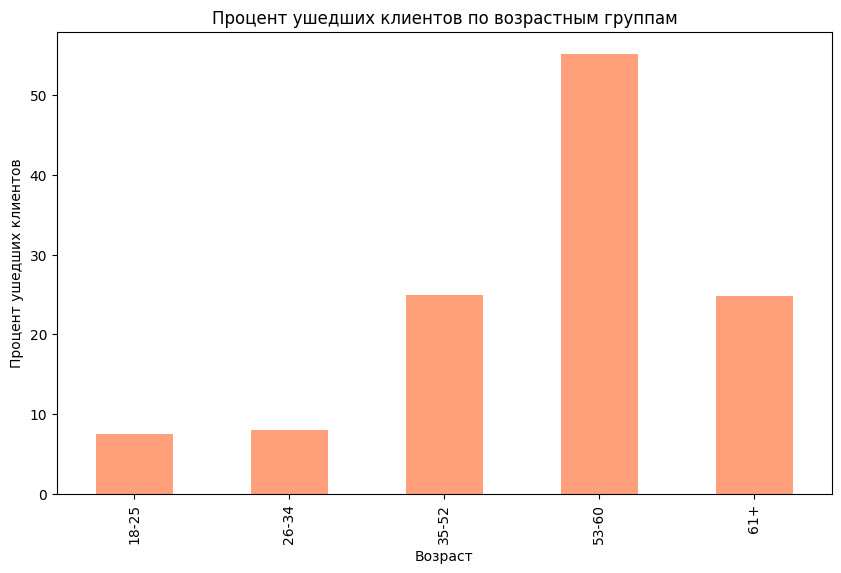

In [22]:
# процент ушедших клиентов по возрастным группам от общего числа клиентов каждой группы:
age_churn = df.pivot_table(index = 'age_group', values = 'Exited', aggfunc =['sum', 'count'])
age_churn.columns = age_churn.columns.droplevel(level=1)
age_churn ['perc'] = age_churn['sum']/age_churn['count']*100

age_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов по возрастным группам',
    color = 'lightsalmon', xlabel = 'Возраст', ylabel = 'Процент ушедших клиентов', figsize = (10,6));
age_churn

* Больше всего отточных клиентов наблюдается в группе 53-60 лет - более 50% пользователей этого возраста уходят.
* Около 25% отточных клиентов у групп 35-52 и 61+ лет.
* Минимальный отток (около 10%) у клиентов 18-34 лет.

In [23]:
# критерий Хи-квадрат
contingency_table_age = pd.crosstab(df['age_group'], df['Exited'])
chi2_age, p_value_age, dof_age, expected_age = chi2_contingency(contingency_table_age)
print(f"Возрастные группы: p-value = {p_value_age:.10f}")

Возрастные группы: p-value = 0.0000000000


Критерий хи-квадрат подтверждает статистическую значимость этой разницы (p-value < 0.00001), что позволяет нам отвергнуть нулевую гипотезу о независимости оттока от возрастной группы клиента.

Сравним профиль группы 53-60 лет с другими группами по значениям ключевых метрик. Учтем, что огромная доля клиентов имеет нулевой баланс.

In [24]:
zero_balance_by_age = df.groupby('age_group')['Balance'].apply(lambda x: (x == 0).mean() * 100).round(1)
print("Доля клиентов с нулевым балансом по возрастным группам (%):")
print(zero_balance_by_age)

Доля клиентов с нулевым балансом по возрастным группам (%):
age_group
18-25    38.5
26-34    38.3
35-52    35.2
53-60    31.6
61+      36.0
Name: Balance, dtype: float64


Как ожидалось, в группах 18-25 доля нулевых балансов самая высокая. Молодые клиенты с большей вероятностью:
* Только что открыли счет.
* Вносят деньги для конкретной операции и сразу их тратят.
* Имеют непостоянный доход.
  
Поэтому их "средний баланс" сильно занижается из-за большого количества нулей. Чтобы понять реальное финансовое поведение активных клиентов каждого возраста, нужно исключить этот шум.

In [25]:
df_active = df[df['Balance'] > 0].copy()

age_profile_active = df_active.groupby('age_group')[
    ['CreditScore', 'Balance', 'NumOfProducts', 'IsActiveMember', 'Exited']
].mean().round(2)

age_balance_median_active = df_active.groupby('age_group')['Balance'].median()
print("Характеристики клиентов с положительным балансом:")
print(age_profile_active)
print("\nМедианный баланс (только активные клиенты):")
print(age_balance_median_active)

Характеристики клиентов с положительным балансом:
           CreditScore    Balance  NumOfProducts  IsActiveMember  Exited
age_group                                                               
18-25           647.98  122030.68           1.36            0.52    0.09
26-34           653.09  119317.57           1.37            0.52    0.10
35-52           651.18  119932.69           1.40            0.48    0.29
53-60           644.79  120388.41           1.37            0.58    0.60
61+             650.63  118331.87           1.36            0.78    0.31

Медианный баланс (только активные клиенты):
age_group
18-25    120266.900
26-34    119794.670
35-52    119960.290
53-60    118882.965
61+      120787.180
Name: Balance, dtype: float64


**Наблюдения:**
1. Финансовые и продуктовые профили активных клиентов всех возрастов статистически идентичны. Средний и медианный баланс, кредитный рейтинг, количество продуктов — практически не отличаются между группами.
2. Причина оттока носит не финансовый, а жизненный и поведенческий характер. Поскольку объективные параметры (доход, кредитоспособность) не объясняют уход, причина, скорее всего, кроется в изменении жизненных обстоятельств и потребностей клиентов этой возрастной группы.
   
**Гипотезы:**
1. Завершение кредитного жизненного цикла. Клиенты закрывают ипотеку и другие крупные кредиты, что устраняет их основную "привязку" к банку.
2. Пенсионная оптимизация. Клиенты активно ищут более выгодные условия для размещения накоплений.
3. Смена банка-партнера. Клиенты переводят все накопления в банк с более выгодными условиями - через который получают пенсию или где им предложили персональное обслуживание.

**Рекомендации:**
1. Неотложная разработка "Пенсионного пакета": Комплексное предложение для клиентов 50+, включающее конкурентоспособные процентные ставки по депозитам, консультации по финансовому планированию и упрощенный доступ к инвестиционным продуктам.
2. Внедрение системы предупредительных оповещений: За 6 месяцев до планового закрытия последнего крупного кредита у клиента менеджер должен выходить на связь для предложения альтернативных продуктов.
3. Партнерские программы: Заключение договоров с пенсионными фондами или работодателями для того, чтобы именно наш банк стал основным для начисления пенсий.

# *3.2 Страна клиента*

,sum,count,perc
Geography,,,
France,810,5014,16.154767
Germany,814,2509,32.443204
Spain,413,2477,16.673395


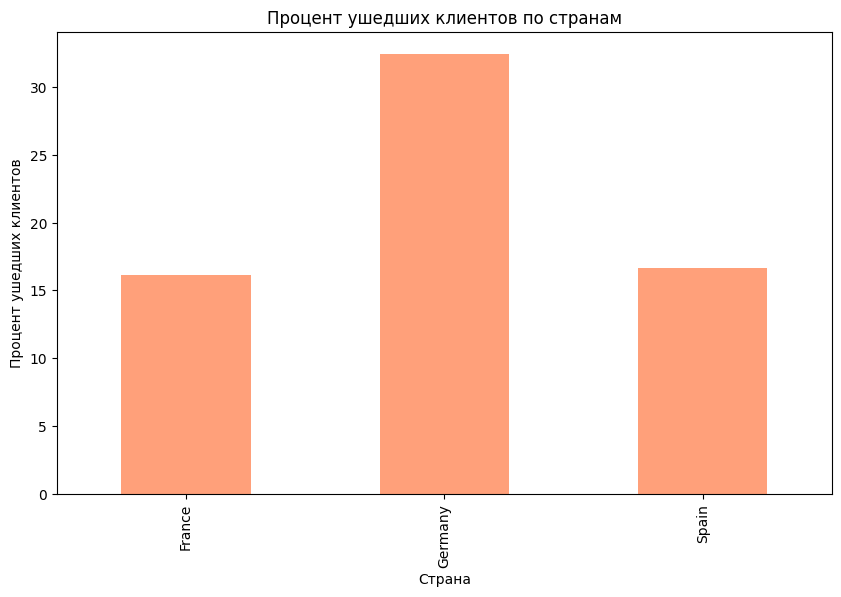

In [26]:
# рассчитаем процент ушедших клиентов в разбивке по странам от общего числа клиентов:
country_churn = df.pivot_table (index = 'Geography', values = 'Exited', aggfunc =['sum', 'count'])
country_churn.columns = country_churn.columns.droplevel(level=1)
country_churn ['perc'] = country_churn['sum']/country_churn['count']*100

country_churn['perc'].plot (
    kind='bar', title = 'Процент ушедших клиентов по странам',
    color = 'lightsalmon', xlabel = 'Страна', ylabel = 'Процент ушедших клиентов', figsize = (10,6));
country_churn

Наибольший отток наблюдается в Германии (более 30%), что примерно в 2 раза больше, чем во Франции и Испании (где чуть больше 15%).

In [27]:
# критерий Хи-квадрат
contingency_table_geo = pd.crosstab(df['Geography'], df['Exited'])
chi2_geo, p_value_geo, dof_geo, expected_geo = chi2_contingency(contingency_table_geo)
print(f"География: p-value = {p_value_geo:.10f}")

География: p-value = 0.0000000000


Критерий хи-квадрат подтверждает статистическую значимость этой разницы (p-value < 0.00001), что позволяет нам отвергнуть нулевую гипотезу о независимости оттока от страны проживания.

Сравним профили ушедших клиентов разных стран по ключевым метрикам, чтобы понять, чем профиль ушедших клиентов Германии отличается от профилей ушедших клиентов Франции и Испании.

In [28]:
exited_df = df[df['Exited'] == 1]
features_to_compare = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']
print("Средние характеристики ушедших клиентов по странам:")
exited_df.groupby('Geography')[features_to_compare].mean().round(1)

Средние характеристики ушедших клиентов по странам:


,CreditScore,Age,Balance,NumOfProducts
Geography,,,,
France,641.9,45.1,71192.8,1.5
Germany,647.7,44.9,120361.1,1.5
Spain,647.5,44.1,72513.4,1.5


Видим, что средний баланс на счету у ушедших клиентов Германии примерно **в 1.7 раза больше**, чем в других странах. 

Из EDA вспомним, что огромная доля клиентов имеет нулевой баланс. Нулевые значения могут быть причиной полученной разницы в средних балансах, поэтому посмотрим, сколько нулевых балансов приходится на каждую страну.

In [29]:
zero_balance_stats = df.groupby('Geography')['Balance'].apply(lambda x: (x == 0).mean() * 100).round(1)
total_zero_balance = (df['Balance'] == 0).mean() * 100

print(f"Общая доля клиентов с нулевым балансом: {total_zero_balance:.1f}%")
print("\nДоля клиентов с нулевым балансом по странам:")
print(zero_balance_stats)

Общая доля клиентов с нулевым балансом: 36.2%

Доля клиентов с нулевым балансом по странам:
Geography
France     48.2
Germany     0.0
Spain      48.4
Name: Balance, dtype: float64


Как видим, **в Германии нет клиентов с нулевым балансом на счету**, когда во Франции и Испании они составляют почти половину всех клиентов. Это объясняет, почему средний баланс клиентов Франции и Испании почти в 2 раза ниже.

Нулевой баланс говорит не о "бедности" клиента, а о неактивности использования расчетного счета. Будем рассматривать клиентов только с положительным балансом, так как нам интересно поведение активных пользователей.

In [30]:
df_active = df[df['Balance'] > 0].copy()

active_churn_balance = df_active[df_active['Exited'] == 1].groupby('Geography')['Balance'].mean().round(1)
print("Средний баланс ушедших клиентов с положительным балансом:")
print(active_churn_balance)

active_all_balance = df_active.groupby('Geography')['Balance'].mean().round(1)
print("\nСредний баланс всех клиентов с положительным балансом:")
print(active_all_balance)

comparison = pd.DataFrame({'Все клиенты': active_all_balance, 'Ушедшие клиенты': active_churn_balance})
comparison['Diff'] = comparison['Ушедшие клиенты'] - comparison['Все клиенты']
print("\nРазница:")
print(comparison)

Средний баланс ушедших клиентов с положительным балансом:
Geography
France     121915.8
Germany    120361.1
Spain      119792.1
Name: Balance, dtype: float64

Средний баланс всех клиентов с положительным балансом:
Geography
France     119927.8
Germany    119730.1
Spain      119815.0
Name: Balance, dtype: float64

Разница:
           Все клиенты  Ушедшие клиенты    Diff
Geography                                      
France        119927.8         121915.8  1988.0
Germany       119730.1         120361.1   631.0
Spain         119815.0         119792.1   -22.9


**Наблюдения:**

1. Выявлен **аномально высокий уровень оттока в Германии** (32.4%) по сравнению с Францией и Испанией (~16.7%). Это указывает на серьезную проблему в немецком филиале.
2. Причиной кажущейся **разницы в благосостоянии клиентов** (средний баланс в Германии в 1.7 раза выше) оказалось различие в структуре клиентской базы:
   * Во Франции и Испании почти половина клиентов (около 48%) *имеют нулевой баланс*, что характерно для новых, неактивных клиентов.
   * В Германии в данных полностью *отсутствуют клиенты с нулевым балансом*.
3. После фильтрации и анализа только клиентов **с положительным балансом** (активная клиентская база) выяснилось, что гипотеза о "более богатых" немецких клиентах не подтвердилась. Средний баланс активных клиентов во всех трех странах почти одинаков.
4. Из анализа разницы в балансе (Diff) между ушедшими и всеми активными клиентами можно выделить три сценария:
   * **Франция: "Отток ценных клиентов"**. Наибольшая положительная разница (+1988) указывает, что уходят самые состоятельные клиенты. Это сигнал о неконкурентных условиях для VIP-сегмента.
   * **Германия: "Смешанный отток"**. Умеренная разница (+631) указывает, что *проблема шире и затрагивает разных клиентов*, но *более состоятельные уходят чаще*. Это может быть связано с *общим падением качества сервиса* при высокой конкуренции.
   * **Испания: "Случайный/естественный отток"**. Минимальная разница (-23) указывает, что уходят клиенты, репрезентативные для всей базы. Это наименее тревожный сценарий, скорее всего связанный с естественными причинами (переезд, смена работы).

**Рекомендации:**

1. Германия (Высокий риск): Требуется срочный аудит качества обслуживания, работы онлайн-банка и анализа конкурентного предложения на рынке. *Проблема системная*.
2. Франция (Высокий риск): Необходимо пересмотреть *условия для клиентов с крупными суммами*. Проблема точечная, в сегменте VIP.
3. Испания (Низкий риск): Рекомендуется усилить стандартные программы лояльности для всех клиентов. Кардинальных изменений не требуется.

# *3.3 Пользовательская активность*

,sum,count,perc
IsActiveMember,,,
0,1302,4849,26.850897
1,735,5151,14.269074


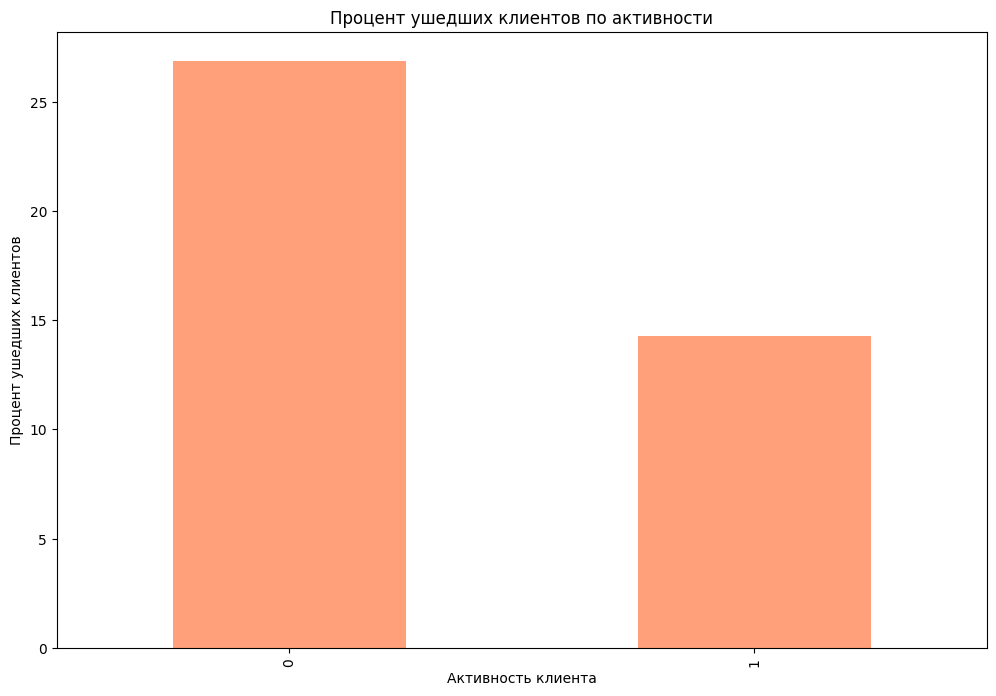

In [31]:
# Рассчитаем процент ушедших клиентов по активности от общего числа клиентов каждой группы::
activity_churn = df.pivot_table (index = 'IsActiveMember', values = 'Exited', aggfunc = ['sum', 'count'])
activity_churn.columns = activity_churn.columns.droplevel(level=1)
activity_churn ['perc'] = activity_churn['sum']/activity_churn['count']*100

activity_churn['perc'].plot(
    kind='bar', title = 'Процент ушедших клиентов по активности', figsize = (12,8), 
    color = 'lightsalmon', ylabel = 'Процент ушедших клиентов', xlabel = 'Активность клиента');
activity_churn

* Отток у неактивных клиентов составляет чуть больше 25%, у активных - около 15%.

In [32]:
# критерий Хи-квадрат
contingency_table_active = pd.crosstab(df['IsActiveMember'], df['Exited'])
chi2_active, p_value_active, dof_active, expected_active = chi2_contingency(contingency_table_active)
print(f"Активность: p-value = {p_value_active:.10f}")

Активность: p-value = 0.0000000000


Критерий хи-квадрат подтверждает статистическую значимость этой разницы (p-value < 0.00001), что позволяет нам отвергнуть нулевую гипотезу о независимости оттока от активности клиента.

In [33]:
df_active = df[df['Balance'] > 0].copy()
activity_profile = df_active.groupby('IsActiveMember')[
    ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'Exited']
].mean().round(2)

print("Сравнительный профиль активных и неактивных клиентов:")
print(activity_profile)

print("\nДоля неактивных клиентов по странам:")
print(df_active.groupby('Geography')['IsActiveMember'].apply(lambda x: (x == 0).mean() * 100).round(1))

print("\nДоля неактивных клиентов по возрастным группам:")
print(df_active.groupby('age_group')['IsActiveMember'].apply(lambda x: (x == 0).mean() * 100).round(1))

Сравнительный профиль активных и неактивных клиентов:
                CreditScore    Age    Balance  NumOfProducts  Exited
IsActiveMember                                                      
0                    648.06  38.52  120458.81           1.39    0.32
1                    654.06  39.84  119229.50           1.38    0.17

Доля неактивных клиентов по странам:
Geography
France     48.7
Germany    50.3
Spain      45.3
Name: IsActiveMember, dtype: float64

Доля неактивных клиентов по возрастным группам:
age_group
18-25    47.9
26-34    48.2
35-52    52.0
53-60    42.4
61+      21.9
Name: IsActiveMember, dtype: float64


**Наблюдения:**
1. Клиенты, не пользующиеся услугами банка, **уходят в 2 раза чаще**, чем активные.
2. Активные и неактивные клиенты практически идентичны по своим объективным характеристикам (CreditScore, Balance, NumOfProducts, Age).
3. Анализ доли неактивных клиентов *по возрастам* выявил структурную проблему:
   * **Пик неактивности наблюдается в группах 35-52 года** (52%). Это клиенты в самом продуктивном возрасте, которые должны быть наиболее лояльными и прибыльными.
   * **Минимум неактивности — в группе 61+** (21.9%). Пенсионеры, напротив, являются самой активной и вовлеченной аудиторией.
   * **Низкая неактивность в группе 53-60 лет** (42.4%) объясняется тем, что клиенты этой группы не становятся неактивными — **они уходят сразу** (мы видели ранее, что их отток 55-60%).

**Гипотезы:**
1. "Остывание" лояльности. Клиенты среднего возраста (35-52) не находят для себя пользы в продуктах банка.
2. Низкое качество цифрового сервиса. Мобильное приложение или онлайн-банк могут быть неудобными, медленными или не предлагать нужный функционал для технически подкованной аудитории среднего возраста, что приводит к снижению активности.
3. Неверная коммуникация. Банк не доносит до этой аудитории свои преимущества и не делает персонализированных предложений, что приводит к потере интереса.

Проблема в том, что банк теряет интерес у своей самой перспективной и денежной аудитории (35-52 года). Также в Германии мы наблюдаем масштабный кризис лояльности клиентов. Немецкие клиенты начинают работать с банком, но затем быстро разочаровываются и перестают им пользоваться, что неминуемо приводит к уходу.

**Рекомендации:**
1. Срочно запустить программу реактивации для клиентов 26-52 лет: Разработать целевую коммуникацию (e-mail, push) с персонализированными предложениями именно для этой аудитории. 
2. Провести опрос среди неактивных клиентов: Точечно выяснить у этой группы, по каким причинам они перестали пользоваться услугами банка.
3. Внедрить триггеры для менеджеров: Клиент, не заходивший в приложение более 1 месяца, должен автоматически попадать в работу отдела удержания для персонального контакта.

# *3.4 Баланс на счету*

Поймем, как размер баланса влияет на отток, и выделим наиболее рисковые сегменты.

In [34]:
# Сегментируем пользователей с положительным балансом на группы
df_active['BalanceSegment'] = pd.qcut(df_active['Balance'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Считаем отток в каждом сегменте
balance_churn = df_active.groupby('BalanceSegment')['Exited'].agg(['mean', 'count']).round(4)
balance_churn['mean'] = balance_churn['mean'] * 100
print("Процент оттока по сегментам баланса:")
print(balance_churn)

Процент оттока по сегментам баланса:
                 mean  count
BalanceSegment              
Low             20.61   1596
Medium          27.38   1596
High            25.33   1595
Very High       22.99   1596


/tmp/ipykernel_13/2599517811.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df_active.groupby('BalanceSegment')['Exited'].agg(['mean', 'count']).round(4)


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


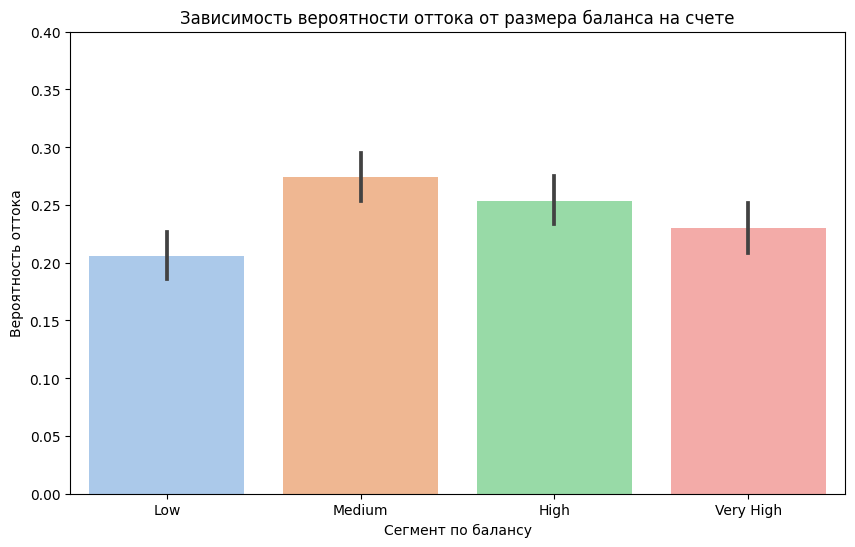

In [35]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_active, x='BalanceSegment', y='Exited', estimator=np.mean, palette='pastel')
plt.title('Зависимость вероятности оттока от размера баланса на счете')
plt.ylabel('Вероятность оттока')
plt.xlabel('Сегмент по балансу')
plt.ylim(0, 0.4)
plt.show()

In [36]:
# t-тест
balance_exited = df[df['Exited'] == 1]['Balance']
balance_stayed = df[df['Exited'] == 0]['Balance']

t_stat, p_value = ttest_ind(balance_exited, balance_stayed, equal_var=False)
print(f"Сравнение баланса: t-статистика = {t_stat:.2f}, p-value = {p_value:.10f}")

Сравнение баланса: t-статистика = 12.47, p-value = 0.0000000000


T-тест показал, что данное различие является статистически значимым. Это подтверждает, что баланс является важным фактором риска.

**Наблюдения:**
1. Наибольший отток наблюдается в сегментах "Medium" и "High".
2. "Medium/High": это клиенты "среднего класса", которые вероятно, не видят для себя достаточной ценности или сталкиваются с наибольшим количеством неудобств.
3. "Very High": относительно низкий отток в этой группе — это хорошая новость. Он может говорить о том, что банк успешно удерживает самых ценных клиентов через персональное обслуживание, эксклюзивные предложения и т.д.
4. Сегмент "Low": низкий отток здесь может быть связан с низкой вовлеченностью. Эти клиенты могут использовать счет для редких операций, поэтому у них нет мотивации активно его закрывать. Или же банк предлагает им удобный бесплатный продукт, который не требует от них усилий для поиска альтернативы.

**Гипотезы:**
1. Сегменту "Medium/High" может не хватать базового качества сервиса (как для сегмента "Low"), но при этом они еще не получают премиального отношения и выгодных условий (как сегмент "Very High"). Они чувствуют себя обделенными.
2. Максимальная конкуренция. На сегмент "Medium/High" приходится наибольшее конкурентное давление. Именно им все банки предлагают стандартные пакеты услуг, и они чаще сравнивают предложения и уходят к тому, кто дал лучшие условия.

Главной проблемой банка является отток самой активной и массовой части клиентской базы - "среднего класса". Это указывает на проблемы в основном продуктовом предложении банка: стандартные тарифы, условия обслуживания и качество сервиса не выдерживают конкуренции и не удовлетворяют потребностей самой широкой аудитории.

**Рекомендации:**
1. Сфокусироваться на улучшении основного продукта: Провести глубокий анализ и пересмотреть условия стандартных банковских пакетов, чтобы сделать их более конкурентными на рынке.
2. Усилить программы лояльности для "среднего класса": Разработать редложения именно для этой аудитории, чтобы повысить ее удержание.
3. Провести опросы и глубинные интервью с клиентами сегментов "Medium" и "High", чтобы выяснить истинные причины их недовольства.
4. Не прекращать программы VIP-обслуживания: Относительно успешное удержание сегмента "Very High" говорит о том, что действующие для них практики работают и их нужно поддерживать.

# *3.5 Пол*

Процент оттока по полу клиента:
         mean  count
Gender              
Female  25.07   4543
Male    16.46   5457


Text(0.5, 0, 'Пол клиента')

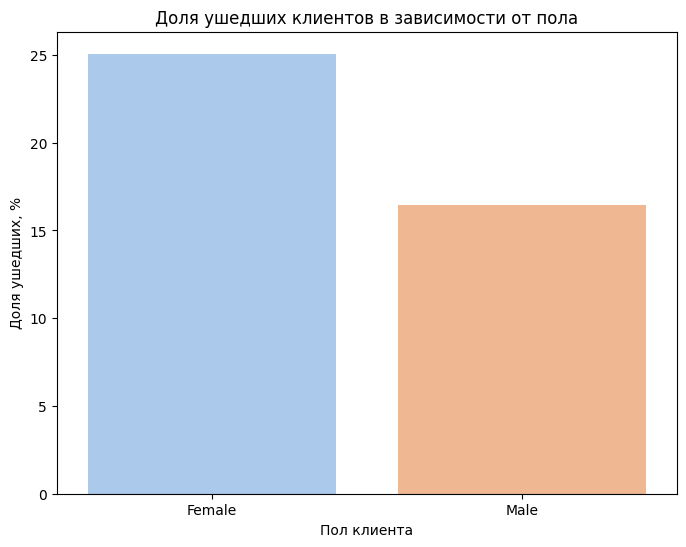

In [37]:
gender_churn = df.groupby('Gender')['Exited'].agg(['mean', 'count']).round(4)
gender_churn['mean'] = gender_churn['mean'] * 100
print("Процент оттока по полу клиента:")
print(gender_churn)

plt.figure(figsize=(8, 6))
sns.barplot(x=gender_churn.index, y=gender_churn['mean'], palette='pastel')
plt.title('Доля ушедших клиентов в зависимости от пола')
plt.ylabel('Доля ушедших, %')
plt.xlabel('Пол клиента')

* Женщины уходят из банка существенно чаще мужчин (почти в 1.5 раза). Сравним профили мужчин и женщин по ключевым метрикам.

In [38]:
# критерий Хи-квадрат
contingency_table_gen = pd.crosstab(df['Gender'], df['Exited'])
chi2_age, p_value_gen, dof_age, expected_age = chi2_contingency(contingency_table_gen)
print(f"Пол: p-value = {p_value_age:.10f}")

Пол: p-value = 0.0000000000


Критерий хи-квадрат подтверждает статистическую значимость этой разницы (p-value < 0.00001), что позволяет нам отвергнуть нулевую гипотезу о независимости оттока от пола клиента.

In [39]:
gender_profile = df.groupby('Gender')[
    ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'HasCrCard', 'Exited']
].mean().round(2)

print("Сравнительный профиль клиентов по полу:")
print(gender_profile)

print("\nМедианный баланс по полу:")
print(df.groupby('Gender')['Balance'].median())

Сравнительный профиль клиентов по полу:
        CreditScore    Age   Balance  NumOfProducts  IsActiveMember  \
Gender                                                                
Female       650.83  39.24  75659.37           1.54            0.50   
Male         650.28  38.66  77173.97           1.52            0.53   

        HasCrCard  Exited  
Gender                     
Female       0.70    0.25  
Male         0.71    0.16  

Медианный баланс по полу:
Gender
Female    96147.55
Male      98064.97
Name: Balance, dtype: float64


* Заметим, что профили клиентов по объективным признакам почти идентичны, значит, разница в оттоке не объясняется стандартными финансовыми или продуктовыми характеристиками.

Проанализируем взаимодействие пола с другими факторами, чтобы понять причину разницы оттока.

In [40]:
# Пол + Возраст 
print("Отток по полу и возрасту (%):")
age_gender_churn = pd.crosstab(df['Gender'], df['age_group'], values=df['Exited'], aggfunc='mean').round(4) * 100
print(age_gender_churn)

# Пол + Страна 
print("\nОтток по полу и странам (%):")
geo_gender_churn = pd.crosstab(df['Gender'], df['Geography'], values=df['Exited'], aggfunc='mean').round(4) * 100
print(geo_gender_churn)

# Пол + Активность
print("\nОтток по полу и активности (%):")
active_gender_churn = pd.crosstab(df['Gender'], df['IsActiveMember'], values=df['Exited'], aggfunc='mean').round(4) * 100
print(active_gender_churn)

# Пол + Количество продуктов
print("\nОтток по полу и количеству продуктов (%):")
products_gender_churn = pd.crosstab(df['Gender'], df['NumOfProducts'], values=df['Exited'], aggfunc='mean').round(4) * 100
print(products_gender_churn)

Отток по полу и возрасту (%):
age_group  18-25  26-34  35-52  53-60    61+
Gender                                      
Female      9.93  10.36  30.03  62.46  30.05
Male        5.60   6.06  20.54  47.70  20.32

Отток по полу и странам (%):
Geography  France  Germany  Spain
Gender                           
Female      20.34    37.55  21.21
Male        12.71    27.81  13.11

Отток по полу и активности (%):
IsActiveMember      0      1
Gender                      
Female          32.09  18.13
Male            22.28  11.20

Отток по полу и количеству продуктов (%):
NumOfProducts      1      2      3      4
Gender                                   
Female         33.19  10.19  86.58  100.0
Male           23.21   5.45  77.78  100.0


**Наблюдения:**
1.  Есть значимая разница в оттоке между женщинами (25.1%) и мужчинами (16.5%).
2. Женщины уходят значительно чаще мужчин во всех сегментах - в любом возрасте, любой стране, при любой активности, с любым количеством используемых продуктов.

**Гипотезы:**
1. Чувствительность к качеству сервиса. Женщины могут быть более внимательны к деталям, качеству обслуживания и прозрачности тарифов. В условиях плохого сервиса или невыгодных условий они принимают решение об уходе быстрее и чаще.
2. Лучшая информированность. Женщины могут активнее сравнивать предложения разных банков, читать отзывы и, обнаружив лучшее предложение на рынке, уходить к конкуренту.
3. Доверие и безопасность. Наличие ошибок, сложностей с безопасностью или непрозрачных списаний может сильнее подрывать доверие именно у женщин-клиентов.

Проблема в качестве продуктов и сервиса банка. Женщины выступают в роли более чувствительного "индикатора" этих проблем. Их повышенный отток — это сигнал об усилении существующих недостатков банка.

**Рекомендации:**
1. Улучшать качество обслуживания для всех. Исправление системных проблем автоматически снизит отток как среди женщин, так и среди мужчин.
2. Сделать акцент на прозрачности и коммуникации. Усилить работу по разъяснению условий продуктов, уведомлению об изменениях тарифов и быстрому решению проблем. Это повысит доверие всех клиентов, но может иметь особенно положительный эффект на удержание женщин.
3. Провести целевые опросы именно среди женщин, уходящих из проблемных сегментов (Германия, возраст 35+), чтобы выявить конкретные причины их недовольства.

# 3.6 Количество используемых продуктов

Статистика оттока по количеству продуктов:
                 mean  count     std
NumOfProducts                       
1               27.71   5084  0.4476
2                7.58   4590  0.2647
3               82.71    266  0.3789
4              100.00     60  0.0000


Text(0.5, 0, 'Количество продуктов')

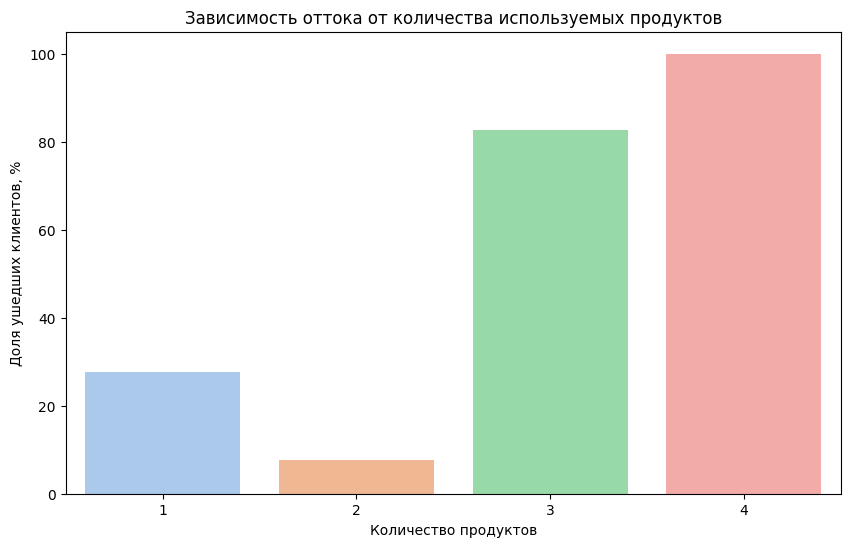

In [41]:
products_churn = df.groupby('NumOfProducts')['Exited'].agg(['mean', 'count', 'std']).round(4)
products_churn['mean'] = products_churn['mean'] * 100
print("Статистика оттока по количеству продуктов:")
print(products_churn)

plt.figure(figsize=(10, 6))
sns.barplot(x=products_churn.index, y=products_churn['mean'], palette='pastel')
plt.title('Зависимость оттока от количества используемых продуктов')
plt.ylabel('Доля ушедших клиентов, %')
plt.xlabel('Количество продуктов')

* Все клиенты (100%), которые пользуются 4-мя продуктами банка - уходят.
* Около 83% клиентов с 3-мя продуктами уходят.
* Наименее склонны к уходу клиенты с 2-мя продуктами - менее 8%.

In [42]:
# Хи-квадрат тест
contingency_table = pd.crosstab(df['NumOfProducts'], df['Exited'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)
print(f"Хи-квадрат тест: p-value = {p_value:.10f}")

if p_value < 0.05:
    print("Разница в оттоке между группами статистически значима.")
else:
    print("Статистически значимой разницы не обнаружено.")

Хи-квадрат тест: p-value = 0.0000000000
Разница в оттоке между группами статистически значима.


Проанализируем отточность клиентов в зависимости от количества продуктов + других факторов.

In [43]:
# Количество продуктов + Активность
print("Отток по количеству продуктов и активности:")
print(pd.crosstab(df_active['NumOfProducts'], df_active['IsActiveMember'], values=df_active['Exited'], aggfunc='mean').round(4) * 100)

# Количество продуктов + Баланс
df_active['BalanceSegment'] = pd.qcut(df_active['Balance'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])
print("\nОтток по количеству продуктов и балансу:")
print(pd.crosstab(df_active['NumOfProducts'], df_active['BalanceSegment'], values=df_active['Exited'], aggfunc='mean').round(4) * 100)

# Количество продуктов + Возраст
print("\nОтток по количеству продуктов и возрасту:")
print(pd.crosstab(df_active['NumOfProducts'], df_active['age_group'], values=df_active['Exited'], aggfunc='mean').round(4) * 100)

Отток по количеству продуктов и активности:
IsActiveMember       0       1
NumOfProducts                 
1                34.23   17.36
2                16.90    9.90
3                96.12   90.77
4               100.00  100.00

Отток по количеству продуктов и балансу:
BalanceSegment     Low  Medium    High  Very High
NumOfProducts                                    
1                21.68   28.58   27.14      25.02
2                11.80   15.98   13.85      11.20
3                94.87   95.74   92.31      93.02
4               100.00  100.00  100.00     100.00

Отток по количеству продуктов и возрасту:
age_group      18-25   26-34   35-52   53-60     61+
NumOfProducts                                       
1               8.64   11.09   30.81   59.72   29.41
2               7.75    4.38   15.64   47.67   22.50
3              75.00   76.19   96.49  100.00  100.00
4                NaN  100.00  100.00  100.00  100.00


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


**Наболюдения:**
1. Клиенты **с 3-4 продуктами** показывают **катастрофический отток**
   * Даже активные клиенты с 3+ продуктами уходят. Это означает, что проблема не в том, что они "остыли", а в том, что их активно не устраивает тот пакет услуг, который они вынуждены использовать.
   * Проблема касается как бедных, так и богатых клиентов. Это системная ошибка в продукте, а не точечная проблема для какого-то сегмента.
   * Во всех возрастных группах отток запредельный.
2. Клиенты **с 1-2 продуктами** проявляют **"здоровое" поведение**
   * Неактивные клиенты уходят чаще, что ожидаемо.
   * Отток немного колеблется в зависимости от доходности сегмента.
   * С возрастом отток растет.

**Гипотезы:**
1. Банк агрессивно продает клиентам третий и четвертый продукты (например, ненужную страховку, инвестиционный продукт с высокими комиссиями, платный пакет услуг). Клиенты чувствуют себя обманутыми и закрывают все счета.
2. 3-4 продукта — это не добровольный выбор, а вынужденная необходимость. Например, чтобы получить ипотеку, клиент обязан оформить кредитную карту и страховку в этом же банке.

**Рекомендации:**
1. Немедленно остановить продажи 3-го и 4-го продуктов до выяснения причин.
2. Провести срочный аудит всех пакетных предложений банка:
   * Проанализировать комиссии и условия для клиентов с 3+ продуктами
   * Проверить, не являются ли эти продукты навязанными
3. Создать рабочую группу по исследованию причин оттока среди этой группы:
   * Провести опросы ушедших клиентов с 3+ продуктами
   * Сделать глубинные интервью с текущими клиентами этой категории
4. Усилить программу перевода клиентов с 1 продукта на 2 продукта (где самый низкий отток).

# 3.7 Кредитный рейтинг

In [44]:
print("Описательная статистика CreditScore:")
print(df['CreditScore'].describe())
print(f"\nМедианный CreditScore: {df['CreditScore'].median()}")

print(f"\nСредний CreditScore у оставшихся: {df[df['Exited'] == 0]['CreditScore'].mean():.1f}")
print(f"Средний CreditScore у ушедших: {df[df['Exited'] == 1]['CreditScore'].mean():.1f}")

Описательная статистика CreditScore:
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: CreditScore, dtype: float64

Медианный CreditScore: 652.0

Средний CreditScore у оставшихся: 651.9
Средний CreditScore у ушедших: 645.4


In [45]:
# t-тест для сравнения средних
credit_exited = df[df['Exited'] == 1]['CreditScore']
credit_stayed = df[df['Exited'] == 0]['CreditScore']

t_stat, p_value = ttest_ind(credit_exited, credit_stayed, equal_var=False)
print(f"T-test: t-статистика = {t_stat:.3f}, p-value = {p_value:.10f}")

if p_value < 0.05:
    print("Различие в кредитных рейтингах статистически значимо.")
else:
    print("Статистически значимого различия не обнаружено.")

T-test: t-статистика = -2.635, p-value = 0.0084647290
Различие в кредитных рейтингах статистически значимо.


**Наболюдения:**
1. Обнаружена статистически значимая, но незначительная по величине разница в средних значениях кредитного рейтинга между ушедшими и оставшимися клиентами
2. CreditScore не является драйвером оттока.

**Рекомендации:** Сфокусировать ресурсы на борьбе с ключевыми драйверами оттока: клиенты предпенсионного возраста, клиенты в Германии, клиенты с 3+ продуктами.

# 4. Сводная таблица анализа оттока клиентов

Создадим таблицу, агрегирующую все ключевые инсайты исследования.

In [46]:
insights_data = {
    'Фактор': [
        'Возраст', 'Возраст', 'Возраст', 'Возраст', 'Возраст',
        'География', 'География', 'География', 
        'Активность', 'Активность',
        'Пол', 'Пол',
        'Баланс', 'Баланс', 'Баланс', 'Баланс',
        'Продукты', 'Продукты', 'Продукты', 'Продукты' 
    ],
    'Категория': [
        '18-25 лет', '26-34 года', '35-52 года', '53-60 лет', '61+ лет',
        'Франция', 'Германия', 'Испания',
        'Активные', 'Неактивные',
        'Женщины', 'Мужчины',
        'Низкий', 'Средний', 'Высокий', 'Очень высокий',
        '1 продукт', '2 продукта', '3 продукта', '4 продукта'  
    ],
    'Размер группы': [
        len(df[df['age_group'] == '18-25']),
        len(df[df['age_group'] == '26-34']),
        len(df[df['age_group'] == '35-52']),
        len(df[df['age_group'] == '53-60']),
        len(df[df['age_group'] == '61+']),
        len(df[df['Geography'] == 'France']),
        len(df[df['Geography'] == 'Germany']),
        len(df[df['Geography'] == 'Spain']),
        len(df[df['IsActiveMember'] == 1]),
        len(df[df['IsActiveMember'] == 0]),
        len(df[df['Gender'] == 'Female']),
        len(df[df['Gender'] == 'Male']),
        len(df_active[df_active['BalanceSegment'] == 'Low']),
        len(df_active[df_active['BalanceSegment'] == 'Medium']),
        len(df_active[df_active['BalanceSegment'] == 'High']),
        len(df_active[df_active['BalanceSegment'] == 'Very High']),
        len(df[df['NumOfProducts'] == 1]),  
        len(df[df['NumOfProducts'] == 2]),
        len(df[df['NumOfProducts'] == 3]),
        len(df[df['NumOfProducts'] == 4])
    ],
    'Доля оттока (%)': [
        df[df['age_group'] == '18-25']['Exited'].mean() * 100,
        df[df['age_group'] == '26-34']['Exited'].mean() * 100,
        df[df['age_group'] == '35-52']['Exited'].mean() * 100,
        df[df['age_group'] == '53-60']['Exited'].mean() * 100,
        df[df['age_group'] == '61+']['Exited'].mean() * 100,
        df[df['Geography'] == 'France']['Exited'].mean() * 100,
        df[df['Geography'] == 'Germany']['Exited'].mean() * 100,
        df[df['Geography'] == 'Spain']['Exited'].mean() * 100,
        df[df['IsActiveMember'] == 1]['Exited'].mean() * 100,
        df[df['IsActiveMember'] == 0]['Exited'].mean() * 100,
        df[df['Gender'] == 'Female']['Exited'].mean() * 100,
        df[df['Gender'] == 'Male']['Exited'].mean() * 100,
        df_active[df_active['BalanceSegment'] == 'Low']['Exited'].mean() * 100,
        df_active[df_active['BalanceSegment'] == 'Medium']['Exited'].mean() * 100,
        df_active[df_active['BalanceSegment'] == 'High']['Exited'].mean() * 100,
        df_active[df_active['BalanceSegment'] == 'Very High']['Exited'].mean() * 100,
        df[df['NumOfProducts'] == 1]['Exited'].mean() * 100,  
        df[df['NumOfProducts'] == 2]['Exited'].mean() * 100,
        df[df['NumOfProducts'] == 3]['Exited'].mean() * 100,
        df[df['NumOfProducts'] == 4]['Exited'].mean() * 100
    ]
}

insights_df = pd.DataFrame(insights_data)

insights_df['Ушедшие клиенты'] = (insights_df['Размер группы'] * insights_df['Доля оттока (%)'] / 100).round(0).astype(int)

overall_churn = df['Exited'].mean() * 100
insights_df['Индекс риска'] = (insights_df['Доля оттока (%)'] / overall_churn).round(2)

def set_priority(row):
    if row['Индекс риска'] >= 1.5 and row['Размер группы'] > 100:
        return 'Критический'
    elif row['Индекс риска'] >= 1.2:
        return 'Высокий'
    elif row['Индекс риска'] >= 0.8:
        return 'Средний'
    else:
        return 'Низкий'

insights_df['Приоритет'] = insights_df.apply(set_priority, axis=1)

hypotheses = {
    '53-60 лет': 'Завершение кредитного жизненного цикла, пенсионная оптимизация финансов',
    'Германия': 'Системные проблемы с качеством обслуживания в филиале',
    'Неактивные': 'Потеря интереса к продукту, нерелевантность предложений',
    'Женщины': 'Повышенная чувствительность к существующим проблемам банка',
    'Средний': 'Неконкурентные условия для массового сегмента клиентов',
    'Высокий': 'Неконкурентные условия для массового сегмента клиентов',
    'Очень высокий': 'Недостаток премиальных услуг для VIP-клиентов',
    '1 продукт': 'Слабая вовлеченность, использование банка для одной цели',
    '2 продукта': '"Золотая середина" - оптимальная интеграция в экосистему банка',
    '3 продукта': 'Нерелевантные или навязанные продукты с плохими условиями',
    '4 продукта': 'Полный провал пакетного предложения, навязанные услуги'
}

insights_df['Ключевая гипотеза'] = insights_df.apply(
    lambda x: hypotheses.get(x['Категория'], '-'), 
    axis=1
)

insights_df.set_index(['Фактор', 'Категория'], inplace=True)

insights_df = insights_df.sort_values(['Приоритет', 'Доля оттока (%)'], ascending=[True, False])

age_order = ['53-60 лет', '61+ лет', '35-52 года', '26-34 года', '18-25 лет']
geo_order = ['Германия', 'Франция', 'Испания']
active_order = ['Неактивные', 'Активные']
gender_order = ['Женщины', 'Мужчины']
balance_order = ['Средний', 'Высокий', 'Очень высокий', 'Низкий']
products_order = ['3 продукта', '4 продукта', '1 продукт', '2 продукта'] 

custom_order = []
for category in age_order:
    custom_order.append(('Возраст', category))
for category in geo_order:
    custom_order.append(('География', category))
for category in active_order:
    custom_order.append(('Активность', category))
for category in gender_order:
    custom_order.append(('Пол', category))
for category in balance_order:
    custom_order.append(('Баланс', category))
for category in products_order:  
    custom_order.append(('Продукты', category))

insights_df = insights_df.reindex(custom_order)

insights_df_reset = insights_df.reset_index()

styled_insights = insights_df_reset.style\
    .background_gradient(subset=['Доля оттока (%)'], cmap='Reds')\
    .background_gradient(subset=['Индекс риска'], cmap='YlOrBr')\
    .format({
        'Доля оттока (%)': '{:.1f}%',
        'Индекс риска': '{:.2f}'
    })\
    .set_caption('Сводная таблица анализа оттока клиентов')\
    .set_properties(**{
        'text-align': 'left',
        'font-family': 'Arial',
        'font-size': '12px'
    })\
    .set_table_styles([
        {'selector': 'caption', 
         'props': [('font-size', '16px'), ('font-weight', 'bold'), 
                   ('text-align', 'center'), ('margin-bottom', '10px')]},
        {'selector': 'th', 
         'props': [('background-color', '#f4f4f4'), ('font-weight', 'bold'),
                   ('text-align', 'left'), ('font-size', '12px')]},
        {'selector': 'tr:hover', 
         'props': [('background-color', '#ffff99')]}
    ])
styled_insights

,Фактор,Категория,Размер группы,Доля оттока (%),Ушедшие клиенты,Индекс риска,Приоритет,Ключевая гипотеза
0,Возраст,53-60 лет,576,55.2%,318,2.71,Критический,"Завершение кредитного жизненного цикла, пенсионная оптимизация финансов"
1,Возраст,61+ лет,464,24.8%,115,1.22,Высокий,-
2,Возраст,35-52 года,5281,24.9%,1314,1.22,Высокий,-
3,Возраст,26-34 года,3068,8.0%,244,0.39,Низкий,-
4,Возраст,18-25 лет,611,7.5%,46,0.37,Низкий,-
5,География,Германия,2509,32.4%,814,1.59,Критический,Системные проблемы с качеством обслуживания в филиале
6,География,Франция,5014,16.2%,810,0.79,Низкий,-
7,География,Испания,2477,16.7%,413,0.82,Средний,-
8,Активность,Неактивные,4849,26.9%,1302,1.32,Высокий,"Потеря интереса к продукту, нерелевантность предложений"
9,Активность,Активные,5151,14.3%,735,0.70,Низкий,-


# 5. Рекомендации по проверке ключевых гипотез

**Гипотеза 1:** Клиенты 53-60 лет уходят из-за невыгодных условий для пенсионных накоплений.

**Варианты проверки гипотезы:**
  * Провести A/B тест: предложить одной части клиентов этого возраста «Пенсионный» пакет с повышенным %, а другой — нет. Сравнить отток.
  * Провести опрос (NPS) среди уходящих клиентов этой группы.
    
**Подразделение:** Продуктовый отдел, CRM-менеджеры.

**Гипотеза 2:** Высокий отток в Германии системными проблемами с качеством обслуживания в филиале.

**Варианты проверки гипотезы:** Проанализировать метрики качества (время ответа в кол-центре, количество жалоб) именно по Германии.

**Подразделение:** Отдел контроля качества.

**Гипотеза 3:** Катастрофический отток клиентов с 3-4 продуктами вызван навязанными услугами или невыгодными пакетными предложениями.

**Варианты проверки гипотезы:**
* Немедленный аудит: Выбрать 100 случайных ушедших клиентов, у которых было 3+ продукта. Проанализировать:
  * Какие именно продукты они использовали.
  * Были ли среди продуктов платные услуги с регулярными списаниями.
  * Сравнить размер комиссий с предложениями конкурентов.
* Глубинные интервью: Найти и опросить 15-20 текущих клиентов с 3+ продуктами. Задать вопросы:
  * «Все ли продукты были вашим осознанным выбором?»
  * «Удобно ли вам управлять всеми продуктами?»

**Подразделение:**  Служба безопасности, отдел исследований.

# 6. Составление портретов отточных клиентов

Проанализировав сводную таблицу, составим три портрета пользователей. 

*Клиент максимального риска* - тот, кого банк теряет прямо сейчас и чей уход наиболее болезнен.

*Клиент скрытого риска* - тот, кто находится на пути к уходу, и его еще можно удержать.

*Лояльный клиент* - тот, кто остается с банком, чтобы понять, что банк делает правильно, и усилить эти качества.

**Портрет №1: Клиент максимального риска.**
* Демография: Женщина 53-60 лет, проживающая в Германии.
* Финансовый профиль: Высокий или очень высокий баланс на счете. 
* Поведение: Неактивный пользователь (редко заходит в приложение/онлайн-банк).
* Почему уходит: Закрыла ипотеку или другой крупный кредит в банке. Не видит дальнейшей ценности в услугах банка. Получила более выгодное предложение от конкурента на размещение своих сбережений.
* Выроятность ухода: Высокая. 
* Угроза бизнесу: Уход такого клиента наносит максимальный прямой финансовый ущерб.

**Портрет №2: Клиент скрытого риска.**
* Демография: Женщина 35-52 года, проживающая во Франции.
* Финансовый профиль: Средний баланс на счете. 
* Поведение: Неактивный пользователь. Не пользуется дополнительными услугами банка.
* Почему может уйти: Не вовлечена в продукты банка. Не видит преимуществ перед конкурентами. При смене работы легко закроет счет.
* Вероятность ухода: Средняя, но таких клиентов много.
* Угроза бизнесу: Уход таких клиентов в совокупности принесет большой финансовый ущерб.

**Портрет №3:** **Лояльный клиент** 

* Демография: Мужчина 26-34 года, проживающий в Испании.
* Финансовый профиль: Средний баланс.
* Поведение: Активный пользователь (регулярно заходит в приложение). 
* Почему остается: Удобный сервис, привычка, выгодный пакет услуг. Вовлечен в экосистему банка.
* Ценность для бизнеса: Высокая. Это стабильная и прогнозируемая база.

# 7. Итоговые выводы и рекомендации по каждому из сегментов

1. Исследование показало, что между оттоком клиентов и некоторыми параметрами существует устойчивая корреляция, тогда как другие параметры практически не влияют на отток.
К параметрам, влияющим на отток, относятся:

Был проведен статистический анализ следующих гипотез:
Гипотеза №1 о различии доходов оставшихся и отточных клиентов: не подтвердилась
Гипотеза №2 о различии в оценке объектов собственности отточных и оставшихся клиентов: подтвердилась
Гипотеза №3 о различии в количестве используемых банковских продуктов оставшихся и отточных клиентов: подтвердилась
Гипотеза №4 о различии в наличии или отсутствии кредитной карты оставшихся и отточных клиентов: подтвердилась

Были выделены и приоритизированы сегменты, в наибольшей степени подверженных оттоку (от 28 до 69% отточных клиентов)